### Imports

In [1]:
import main_var
env = "test/"
mv = main_var.main_var(env=env)

from article_parsing_lib import *
from article_scraping_lib import *
from openai_module_lib import *
from embedding_keyword_module_lib import *

imported 'utils_art'



Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassifi

## Querring and saving artilce list

In [ ]:
df = loop_scraping(8,'2010-01-01','2024-01-01',sampling_1=12,sampling_2=3,save_steps=True,save_final=True,display=True)

#### Display Statistics


   ------   Raw dataframe   ------   

Shape :  [23314, 13]
Column type :  Unnamed: 0       int64
title           object
link            object
published       object
source_url      object
source_title    object
category        object
year             int64
year_month      object
pk              object
url_list        object
url_TLD         object
hash_key        object
dtype: object



   ------   Most common sources   ------   

source_title
Entertainment Weekly News     1242
Forbes                         811
Science                        670
Nature.com                     597
The New York Times             586
                              ... 
Office of the President          1
The Chronicle of the Horse       1
99% Invisible                    1
SC Times                         1
cehd.umn.edu                     1
Name: count, Length: 3205, dtype: int64






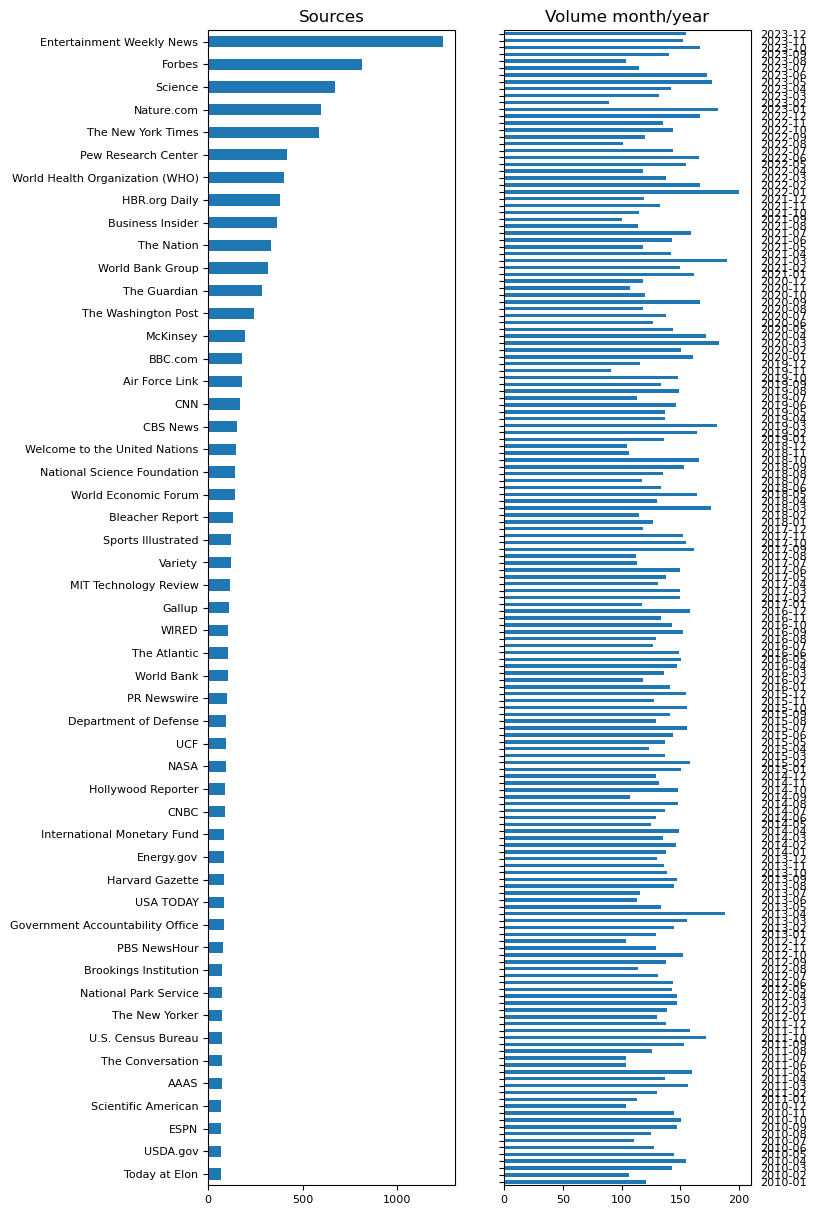

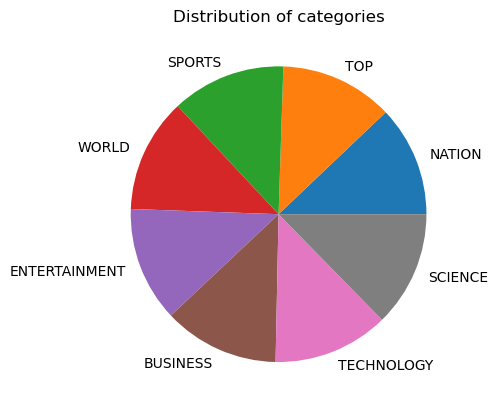

In [2]:
df = openDFcsv(mv.query_path,"query_fileG_final")
plotDFstatisticsQuerry(df)
displayStats(df)

#### Filter articles with a source that is too/not enought scrapped and source/category/date

 - START -      {'Articles sum': 23314, 'Unique sources': 3205, 'Unique/Sum': 7.27}
 - TOO LOW -    {'Articles sum': 10327, 'Unique sources': 3099, 'Unique/Sum': 3.33}
 - TOO HIGH -   {'Articles sum': 4722, 'Unique sources': 7, 'Unique/Sum': 674.57}
 - WO LOW -     {'Articles sum': 12987, 'Unique sources': 106, 'Unique/Sum': 122.52}
 - LOSS -       {'Articles sum': '10327 (-44.3%)', 'Unique sources :': '3099 (-96.69%)', 'Unique/Sum': '7.27 -> 122.52'}
source_title
World Health Organization (WHO)    400
Pew Research Center                400
The New York Times                 400
Nature.com                         400
Science                            400
                                  ... 
Tax Foundation                      31
The Denver Post                     31
Union of Concerned Scientists       31
EIA                                 31
Stanford University News            30
Name: count, Length: 106, dtype: int64

   ------   Raw dataframe   ------   

Shape :  [11065, 13]
Co

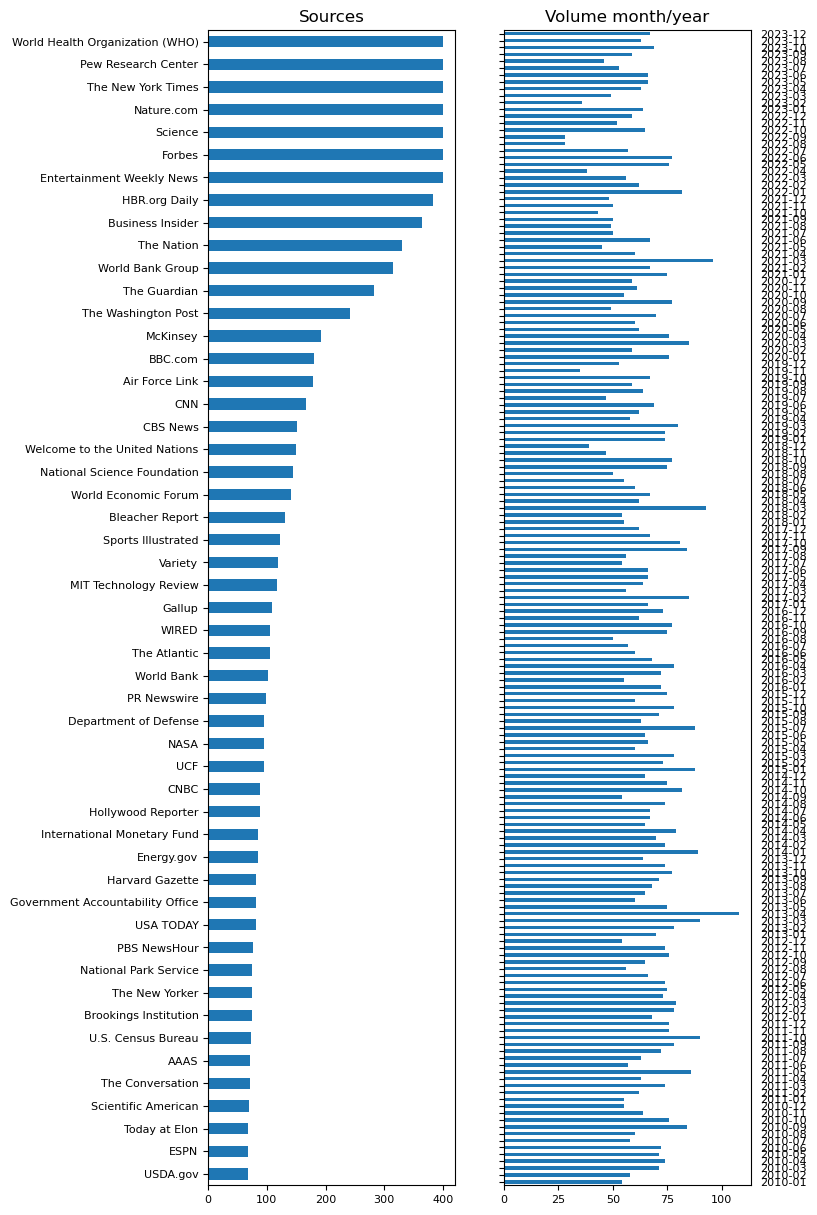

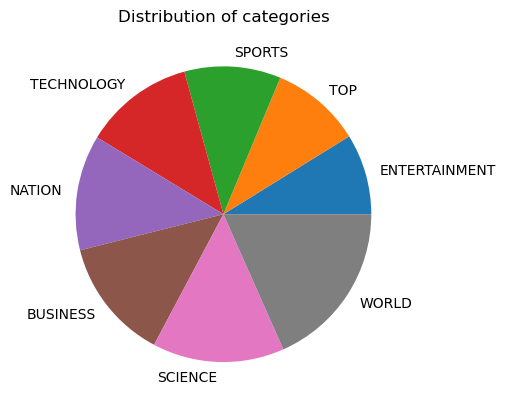

In [3]:
df2 = filterQuerryDataset(df,400,30,True,False,True)
plotDFstatisticsQuerry(df2)
displayStats(df2)

In [4]:
categroy_l = ["WORLD","NATION","BUSINESS","TECHNOLOGY"]
categroy_l = []
# source_l = ["The New York Times","The Nation","Business Insider","Business Insider"]
source_l = ["Newsweek","Yahoo Finance","ESPN","Fox News"]
source_l = ["World Health Organization (WHO)","Pew Research Center","The New York Times","Nature.com","Tax Foundation","Union of Concerned Scientists"]
df3 = selectOnDf(df2,date_start="2010-01-01", date_end="2024-01-01", categroy_list=categroy_l, source_list=source_l)
displayStats(df3)
saveDFcsv(df3,mv.query_path,"query_fileG_cap")


   ------   Raw dataframe   ------   

Shape :  [1662, 13]
Column type :  Unnamed: 0      object
title           object
link            object
published       object
source_url      object
source_title    object
category        object
year            object
year_month      object
pk              object
url_list        object
url_TLD         object
hash_key        object
dtype: object



   ------   Most common sources   ------   

source_title
Nature.com                         400
The New York Times                 400
Pew Research Center                400
World Health Organization (WHO)    400
Tax Foundation                      31
Union of Concerned Scientists       31
Name: count, dtype: int64






True

In [ ]:
df = readArticleFileTable(index_from=0,index_to=1662,save_articles=True,save_final=True,save_steps=True,display_df=True,step_pct=0.025,add_nlp=2,filtered_input_df=True)

 - Loadind Article #0   (Valid Article)
 - Loadind Article #1   (Valid Article)
 - Loadind Article #2   (Valid Article)
 - Loadind Article #3   (Valid Article)
 - Loadind Article #4   (Valid Article)
 - Loadind Article #5   (Valid Article)
 - Loadind Article #6   (Valid Article)
 - Loadind Article #7   (Valid Article)
 - Loadind Article #8   (Valid Article)
 - Loadind Article #9   (Valid Article)
 - Loadind Article #10   (Valid Article)
 - Loadind Article #11   (Valid Article)
 - Loadind Article #12   (Valid Article)
 - Loadind Article #13   (Valid Article)
 - Loadind Article #14   (Valid Article)
 - Loadind Article #15   (Valid Article)
 - Loadind Article #16   (Valid Article)
 - Loadind Article #17   (Valid Article)
 - Loadind Article #18   (Valid Article)
 - Loadind Article #19   (Valid Article)
 - Loadind Article #20   (Valid Article)
 - Loadind Article #21   (Valid Article)
 - Loadind Article #22   (Valid Article)
 - Loadind Article #23   (Valid Article)
 - Loadind Article #24   (

 - Loadind Article #198   (Valid Article)
 - Loadind Article #199   (Valid Article)
 - Loadind Article #200   (Valid Article)
 - Loadind Article #201   (Valid Article)
 - Loadind Article #202   (Valid Article)
 - Loadind Article #203   (Valid Article)
 - Loadind Article #204   (Valid Article)
 - Loadind Article #205   (Valid Article)
 - Loadind Article #206   (Valid Article)
 - Loadind Article #207   (Valid Article)
 - Loadind Article #208   (Valid Article)
 - Loadind Article #209   (Valid Article)
 - Loadind Article #210   (Valid Article)
 - Loadind Article #211   (Valid Article)
 - Loadind Article #212   (Valid Article)
 - Loadind Article #213   (Valid Article)
 - Loadind Article #214   (Valid Article)
 - Loadind Article #215   (Valid Article)
 - Loadind Article #216   (Valid Article)
 - Loadind Article #217   (Valid Article)
 - Loadind Article #218   (Valid Article)
 - Loadind Article #219   (Valid Article)
 - Loadind Article #220   (Valid Article)
 - Loadind Article #221   (Valid A

 - Loadind Article #394   (Valid Article)
 - Loadind Article #395   (Valid Article)
 - Loadind Article #396   (Valid Article)
 - Loadind Article #397   (Valid Article)
 - Loadind Article #398   (Valid Article)
 - Loadind Article #399   (Valid Article)
 - Loadind Article #400   (Valid Article)
 - Loadind Article #401   (Valid Article)
 - Loadind Article #402   (Valid Article)
 - Loadind Article #403   (Valid Article)
 - Loadind Article #404   (Valid Article)
 - Loadind Article #405   (Valid Article)
 - Loadind Article #406   (Valid Article)
 - Loadind Article #407   (Valid Article)
 - Loadind Article #408   (Valid Article)
 - Loadind Article #409   (Valid Article)
 - Loadind Article #410   (Valid Article)
 - Loadind Article #411   (Valid Article)
 - Loadind Article #412   (Valid Article)
 - Loadind Article #413   (Valid Article)
 - Loadind Article #414   (Valid Article)
 - Loadind Article #415   (Valid Article)
 - Loadind Article #416   (Valid Article)
 - Loadind Article #417   (Valid A

 - Loadind Article #590   (Valid Article)
 - Loadind Article #591   (Valid Article)
 - Loadind Article #592   (Valid Article)
 - Loadind Article #593   (Valid Article)
 - Loadind Article #594   (Valid Article)
 - Loadind Article #595   (Valid Article)
 - Loadind Article #596   (Valid Article)
 - Loadind Article #597   (Valid Article)
 - Loadind Article #598   (Valid Article)
 - Loadind Article #599   (Valid Article)
 - Loadind Article #600   (Valid Article)
 - Loadind Article #601   (Valid Article)
 - Loadind Article #602   (Valid Article)
 - Loadind Article #603   (Valid Article)
 - Loadind Article #604   (Valid Article)
 - Loadind Article #605   (Valid Article)
 - Loadind Article #606   (Valid Article)
 - Loadind Article #607   (Valid Article)
 - Loadind Article #608   (Valid Article)
 - Loadind Article #609   (Valid Article)
 - Loadind Article #610   (Valid Article)
 - Loadind Article #611   (Valid Article)
 - Loadind Article #612   (Valid Article)
 - Loadind Article #613   (Valid A

In [ ]:
df = joinQuerryAndParse(save=True,remove_invalid=True,display=True,filtered_input_df=True)

In [ ]:
df2 = mainGeneration(True,False,True,True,True,0.1)

In [ ]:
emb_mat = extractEmbeddingFromFile(999999999)

In [ ]:
df = mainKeywordWF(common_word_max=50)

In [ ]:
col_list = ["category","source_title","year_month","url_TLD","year"]
df_list_len = calculateStatsColList(df,col_list,"len",display_df=True)
df_list_npl = calculateStatsColList(df,col_list,"nlp",display_df=True,display_stats=False) 

In [ ]:
print(df2.dtypes)